In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model
from importlib.resources import path
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr

In [2]:
(X_train, Y_train), (x_test, y_test) = mnist.load_data()

Here I am normalizing the data instead of being form 0 to 255 I am making it between 0 and 1

(28, 28, 1)


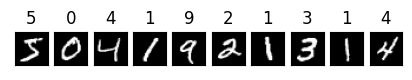

In [3]:
X_train, x_test = X_train/255.0, x_test/255.0

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

fig = plt.figure(figsize=(5, 3))
for i in range(10):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]), cmap='gray')
    ax.set_title(Y_train[i])
input_shape = X_train.shape[1:]
print(input_shape)

Here we I will create the neural network that I will train to classify the digits.

In [13]:
model = Sequential([
    Conv2D(32, (5,5), padding="Same", activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (5,5), padding="Same", activation='relu'),
    MaxPool2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='Same', activation='relu', input_shape=(28,28,1)),
    Conv2D(64, (3,3), padding='Same', activation='relu'),
    MaxPool2D((2,2),(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

Now after creating the neural network, I will train it on the MNIST dataset

In [20]:
model.compile(
    optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    print(logs)
    if(logs.get('accuracy') > 0.999):
      print("\nIt's accurate enough so let's stop!\n")
      self.model.stop_training = True
                            
callbacks = myCallback()


learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(
  monitor='val_accuracy',
  patience=3,
  factor=0.5,
  min_lr=0.00001
  )

model.fit(
    X_train, 
    Y_train,
    epochs=30,
    batch_size=112,
    callbacks=[callbacks, learning_rate_reduction],
    validation_data=(x_test, y_test)
)

Epoch 1/30
536/536 [==============================] - 129s 240ms/step - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0309 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 2/30
536/536 [==============================] - 125s 234ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0298 - val_accuracy: 0.9901 - lr: 0.0010
Epoch 3/30
536/536 [==============================] - 126s 235ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0252 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 4/30
536/536 [==============================] - 131s 244ms/step - loss: 0.0276 - accuracy: 0.9919 - val_loss: 0.0215 - val_accuracy: 0.9924 - lr: 0.0010
Epoch 5/30
536/536 [==============================] - 130s 242ms/step - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.0196 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 6/30
536/536 [==============================] - 125s 233ms/step - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0259 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 7/30
536/536 [==========================

KeyboardInterrupt: 

Saving the model to not do the whole trainning again.

In [21]:
model.save("digit_classification.h5")

Here we will store the predicitons from the test dataset. 

In [22]:
predictions = model.predict([x_test])

313/313 [==============================] - 10s 31ms/step


Here we are trying to display the results of some predictions.

6


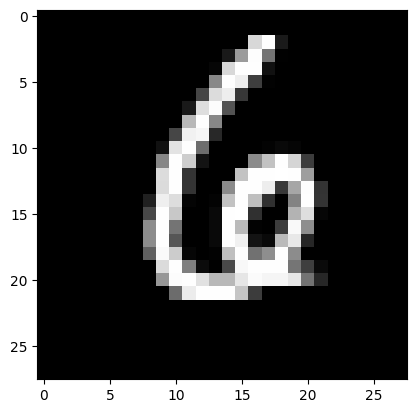

In [23]:
print(np.argmax(predictions[123]))
plt.imshow(x_test[123], cmap='gray')
plt.show()

Finally, here is the accuracy of the model:

In [24]:
(model_loss, model_accuracy) = model.evaluate(x_test, y_test)

313/313 [==============================] - 10s 32ms/step - loss: 0.0204 - accuracy: 0.9950


In [25]:
print(f'the accuracy of my model is: {model_accuracy * 100}%')

the accuracy of my model is: 99.50000047683716%


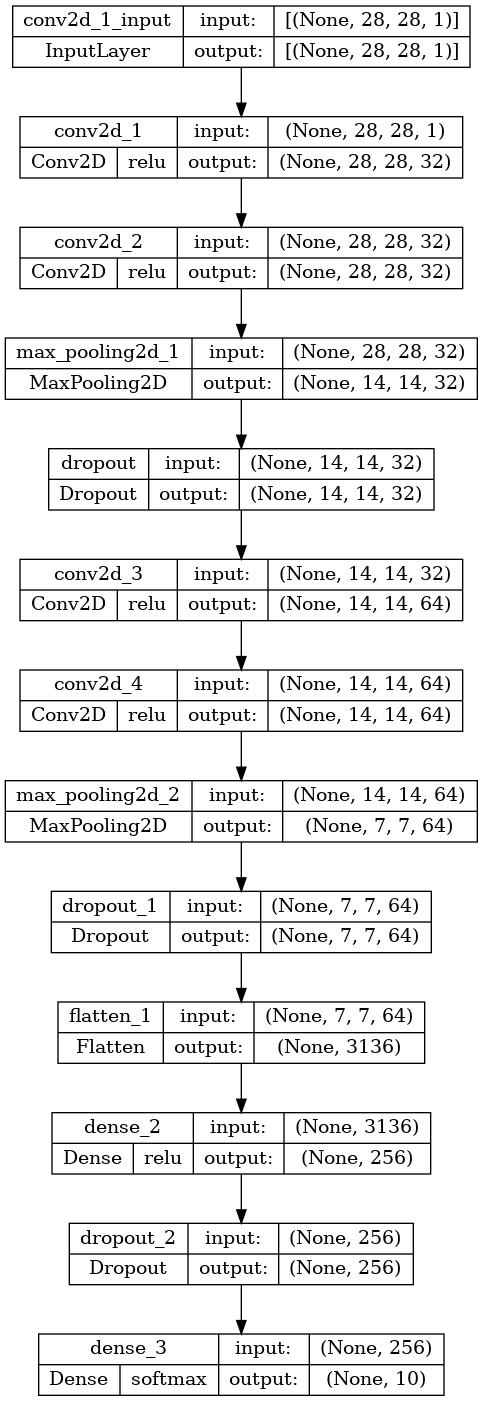

In [26]:
plot_model(
    model, 
    to_file='NN_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TL",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)